# Trabalho Final
**Disciplina**: Algoritmos e Estrutura de Dados II

**Componentes**: Sueyvid, Joel e Ênio

Este notebook tem como objetivo construir e analisar uma rede complexa baseada em artigos da Wikipedia. Ele segue os passos de obtenção de dados, construção da rede, eliminação de duplicatas e truncagem da rede para focar nos nós mais relevantes.

## 1. Get the Data, Build the Network

Installing and preparing the libs:

In [ ]:
!pip install wikipedia


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=5f7ef51c700675af95f72599f5c659f0853425d095c5a4fa1049b8d7d9954e96
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import re
from difflib import SequenceMatcher

In [ ]:
nx.__version__

'3.6.1'

Setting the seed and Constructing the black list of stop words:

In [ ]:
#https://en.wikipedia.org/wiki/Complex_network

SEEDS = [
    "Complex Network",       # Assunto original
    "Artificial Intelligence", # Assunto Tech
    "Climate change",        # Assunto Natureza/Ciência
    "Nelson Mandela",        # Assunto Histórico/Político
    "Earth"            # Assunto Cultura Pop
]
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

snowballing process:

In [ ]:
#todo_lst = [(0, SEED)] # The SEED is in the layer 0
#todo_set = set(SEED) # The SEED itself
#done_set = set() # Nothing is done yet

# 2. Inicializa as estruturas de dados
todo_lst = []    # A fila de processamento
todo_set = set() # Para evitar duplicatas na fila
done_set = set() # Para guardar o que já foi processado

# 3. Loop de "Pré-aquecimento": Adiciona os 5 seeds na camada 0
for subject in SEEDS:
    # Formata o título para evitar erros (ex: minúsculas/maiúsculas)
    s_title = subject.title()

    # Adiciona na fila apenas se ainda não estiver lá
    if s_title not in todo_set:
        todo_lst.append((0, s_title)) # (camada, titulo)
        todo_set.add(s_title)

print(f"Começando a raspagem com {len(todo_lst)} tópicos iniciais: {todo_set}")

Começando a raspagem com 5 tópicos iniciais: {'Artificial Intelligence', 'Nelson Mandela', 'Earth', 'Complex Network', 'Climate Change'}


In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Complex Network'

In [ ]:
MAX_LINKS = 12
LIMIT_LAYER = 3

In [ ]:
padrao_lixo = re.compile(r'(Categoria:|Lista de|Ficheiro:|Predefinição:|Wikipédia:|International Standard|\d{4})')

def calcular_relevancia(texto_base, candidato):
    try:
        score = SequenceMatcher(None, texto_base.lower(), candidato.lower()).ratio()
        if texto_base.lower() in candidato.lower() or candidato.lower() in texto_base.lower():
            score += 0.2
        return score
    except:
        return 0

In [ ]:
%%time

while todo_lst:
    current_layer, page = todo_lst.pop(0)

    if current_layer >= LIMIT_LAYER:
        # print(f"Camada: {current_layer} | Nó final (sem expansão): {page}")
        continue

    done_set.add(page)

    print(f"Camada: {current_layer} | Processando: {page}")

    try:
        wiki = wikipedia.page(page, auto_suggest=False)
    except Exception as e:
        print(f"  -> Erro ao carregar '{page}': {e}")
        continue

    # --- HEURÍSTICA HÍBRIDA ---

    todos_links = wiki.links
    candidatos_com_score = []
    candidatos_reserva = []

    for link in todos_links:
        if link in STOPS or padrao_lixo.search(link):
            continue
        if link in todo_set or link in done_set:
            continue

        score = calcular_relevancia(page, link)

        if score > 0.4:
            candidatos_com_score.append((link, score))
        else:
            candidatos_reserva.append(link)

    # Seleção
    candidatos_com_score.sort(key=lambda x: x[1], reverse=True)
    vip_links = [x[0] for x in candidatos_com_score]

    selecionados = vip_links[:MAX_LINKS]
    vagas_restantes = MAX_LINKS - len(selecionados)

    if vagas_restantes > 0:
        selecionados.extend(candidatos_reserva[:vagas_restantes])

    # Adicionar ao Grafo e à Fila
    for link_escolhido in selecionados:
        g.add_edge(page, link_escolhido)

        if link_escolhido not in todo_set:
            todo_lst.append((current_layer + 1, link_escolhido))
            todo_set.add(link_escolhido)

print("-" * 30)
print(f"Grafo Finalizado!")
print(f"Total de Nós: {len(g)}")
print(f"Total de Arestas: {nx.number_of_edges(g)}")

Camada: 0 | Processando: Complex Network
Camada: 0 | Processando: Artificial Intelligence
Camada: 0 | Processando: Climate Change
Camada: 0 | Processando: Nelson Mandela
Camada: 0 | Processando: Earth
Camada: 1 | Processando: Complex Networks
Camada: 1 | Processando: Computer network
Camada: 1 | Processando: Boolean network
Camada: 1 | Processando: Climate networks
Camada: 1 | Processando: Social network
Camada: 1 | Processando: Complex contagion
Camada: 1 | Processando: Flow network
Camada: 1 | Processando: Scale-free network
Camada: 1 | Processando: Spatial network
Camada: 1 | Processando: Scale-free networks
Camada: 1 | Processando: Evolving network
Camada: 1 | Processando: Biological network
Camada: 1 | Processando: Artificial Intelligence Act
Camada: 1 | Processando: Artificial intelligence art
Camada: 1 | Processando: A.I. Artificial Intelligence
Camada: 1 | Processando: Weak artificial intelligence
Camada: 1 | Processando: Frame (artificial intelligence)
Camada: 1 | Processando:

In [ ]:
#print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
print(f"Grafo finalizado: {len(g)} nós, {nx.number_of_edges(g)} arestas")

Grafo finalizado: 9193 nós, 9188 arestas


## 2. Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Complex Network', 'Complex Networks'), ('Social network', 'Social networks'), ('Scale-free network', 'Scale-free networks'), ('Spatial network', 'Spatial networks'), ('Evolving network', 'Evolving networks'), ('Climate change scenario', 'Climate change scenarios'), ('Nelson Mandela Bridge', 'Nelson Mandela Bridges'), ('Earthquake', 'Earthquakes'), ('Complex network', 'Complex networks'), ('Semantic network', 'Semantic networks'), ('Small-world network', 'Small-world networks'), ('Artificial neural network', 'Artificial neural networks'), ('Neural network', 'Neural networks'), ('Internet', 'Internets'), ('Biological neural network', 'Biological neural networks'), ('Weighted network', 'Weighted networks'), ('Gene regulatory network', 'Gene regulatory networks'), ('Intelligent agent', 'Intelligent agents'), ('Climate change feedback', 'Climate change feedbacks'), ('Climate model', 'Climate models'), ('Earth science', 'Earth sciences'), ('Planetary symbol', 'Planetary symbols'), ('Alche

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

9123 nodes, 9163 edges


In [ ]:
nx.write_graphml(g, "cna.graphml")

## 3. Truncate the network

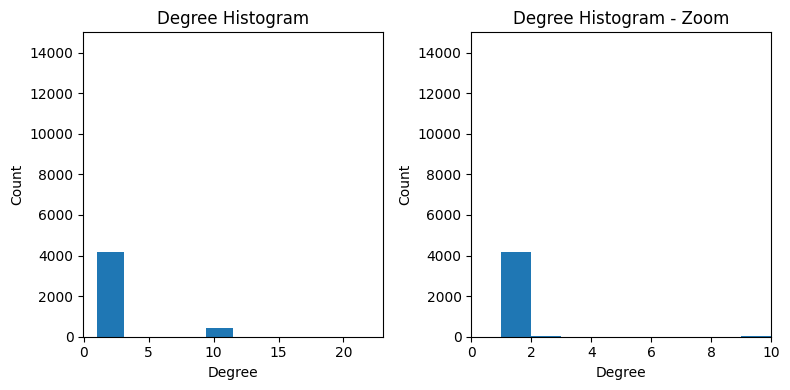

477 nodes, 496 edges


In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()


# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna2.graphml")